# Bayesian Logistic Regression demo

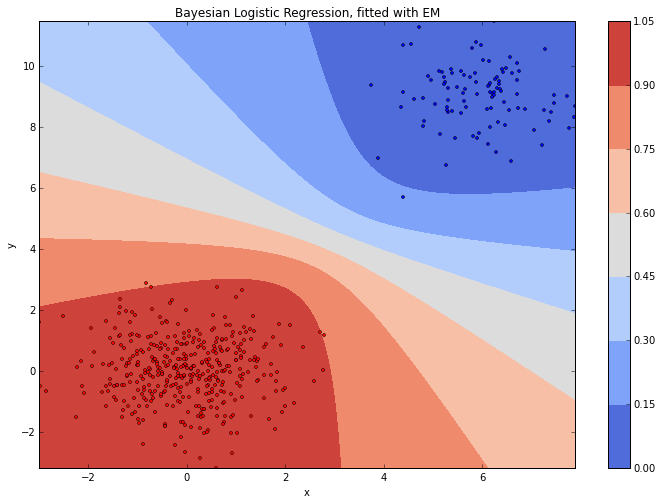

In [4]:
import os
import numpy as np
from bayesian_logistic_regression import BayesianLogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
        
# create data set 
x          = np.zeros([500,2])
x[:,0]     = np.random.normal(0,1,500)
x[:,1]     = np.random.normal(0,1,500)
x[0:100,0] = x[0:100,0] + 6
x[0:100,1] = x[0:100,1] + 9
y          = np.ones(500)
y[0:100]   = 0
blr        = BayesianLogisticRegression(x,y, evidence_max_method ="EM")
blr.fit()

# create grid for heatmap
n_grid = 500
max_x      = np.max(x,axis = 0)
min_x      = np.min(x,axis = 0)
X1         = np.linspace(min_x[0],max_x[0],n_grid)
X2         = np.linspace(min_x[1],max_x[1],n_grid)
x1,x2      = np.meshgrid(X1,X2)
Xgrid      = np.zeros([n_grid**2,2])
Xgrid[:,0] = np.reshape(x1,(n_grid**2,))
Xgrid[:,1] = np.reshape(x2,(n_grid**2,))

blr_grid   = blr.predict_prob(Xgrid)
plt.figure(figsize=(12,8))
plt.contourf(X1,X2,np.reshape(blr_grid,(n_grid,n_grid)),cmap="coolwarm")
plt.plot(x[y==0,0],x[y==0,1],"bo", markersize = 3)
plt.plot(x[y==1,0],x[y==1,1],"ro", markersize = 3)
plt.colorbar()
plt.title("Bayesian Logistic Regression, fitted with EM")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
